In [51]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [50]:
iris = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

In [31]:
clf = SVC(gamma='auto')
clf.fit(x_train, y_train)

SVC(gamma='auto')

In [33]:
y_pred = clf.predict(x_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [34]:
y_true = y_test

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')

accuracy, precision, recall

(1.0, 1.0, 1.0)

In [35]:
# for getting labels as the final prediction i.e setosa, virginca, versicolour instead of a number like 0,1,2
clf.fit(iris.data, iris.target_names[iris.target])

SVC(gamma='auto')

In [38]:
label_pred= clf.predict(iris.data)
label_pred

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica

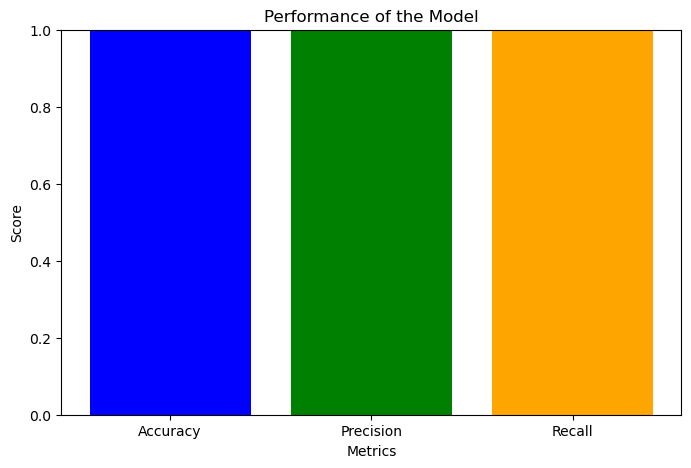

In [45]:
metrics = ['Accuracy', 'Precision', 'Recall']
scores = [accuracy, precision, recall]

plt.figure(figsize=(8, 5))
plt.bar(metrics, scores, color=['blue', 'green', 'orange'])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Performance of the Model')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for better visualization
plt.show()

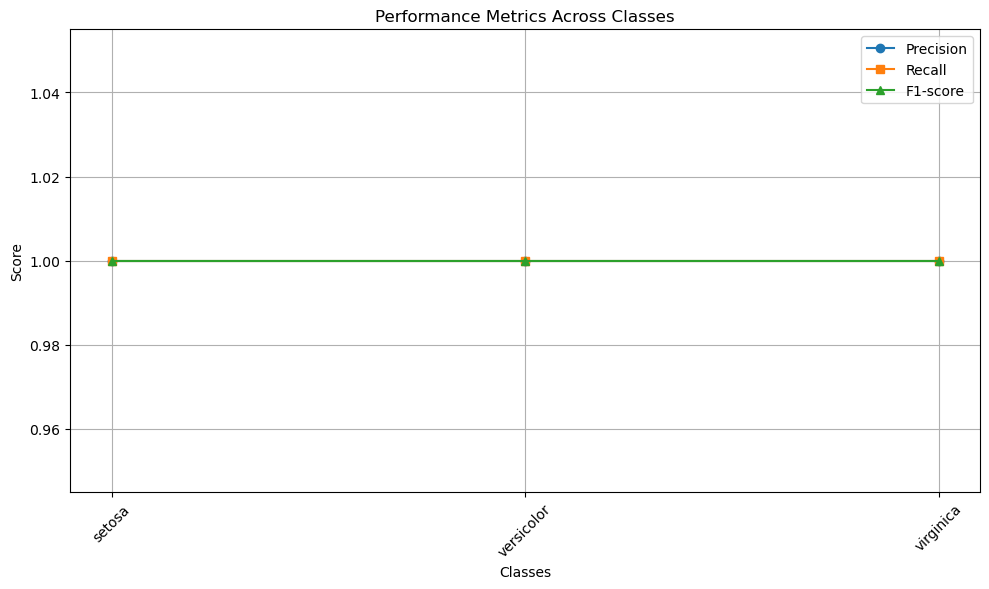

In [52]:
precision, recall, fscore, _ = precision_recall_fscore_support(y_true, y_pred, average=None, labels=np.unique(y_true))

# Plot the performance metrics for each class
plt.figure(figsize=(10, 6))
classes = iris.target_names
plt.plot(classes, precision, marker='o', label='Precision')
plt.plot(classes, recall, marker='s', label='Recall')
plt.plot(classes, fscore, marker='^', label='F1-score')
plt.xlabel('Classes')
plt.ylabel('Score')
plt.title('Performance Metrics Across Classes')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

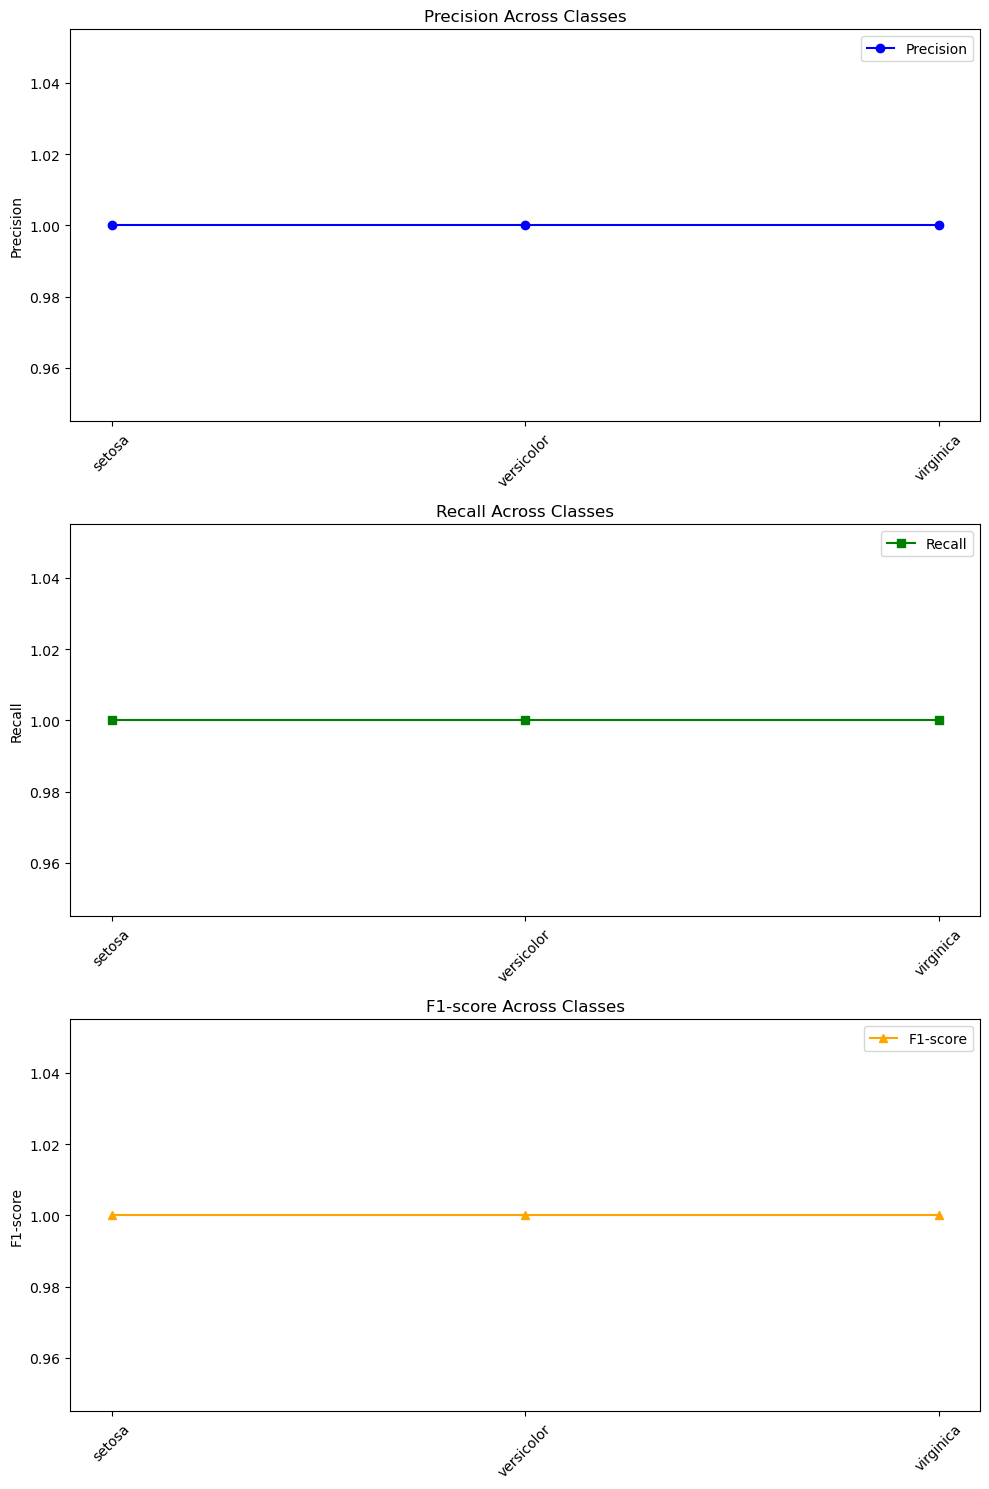

In [53]:
precision, recall, fscore, _ = precision_recall_fscore_support(y_true, y_pred, average=None, labels=np.unique(y_true))

# Plot the performance metrics for each class using subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

classes = iris.target_names
x = np.arange(len(classes))  # Generate x-axis indices for each class

# Plot precision
axes[0].plot(x, precision, marker='o', label='Precision', color='blue')
axes[0].set_xticks(x)
axes[0].set_xticklabels(classes, rotation=45)
axes[0].set_ylabel('Precision')
axes[0].set_title('Precision Across Classes')
axes[0].legend()

# Plot recall
axes[1].plot(x, recall, marker='s', label='Recall', color='green')
axes[1].set_xticks(x)
axes[1].set_xticklabels(classes, rotation=45)
axes[1].set_ylabel('Recall')
axes[1].set_title('Recall Across Classes')
axes[1].legend()

# Plot F1-score
axes[2].plot(x, fscore, marker='^', label='F1-score', color='orange')
axes[2].set_xticks(x)
axes[2].set_xticklabels(classes, rotation=45)
axes[2].set_ylabel('F1-score')
axes[2].set_title('F1-score Across Classes')
axes[2].legend()

plt.tight_layout()
plt.show()